This notebook is used to compare runs with new residual forcing to old ones. Have thigns dramatically changed?


In [1]:
%matplotlib inline
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np

import arrow
import datetime
import pandas as pd
from dateutil import tz
from salishsea_tools import tidetools
from salishsea_tools import stormtools
from salishsea_tools import nc_tools
from salishsea_tools import stormtools_revisions

from __future__ import division
import csv

In [2]:
path = '/ocean/nsoontie/MEOPAR/SalishSea/results/storm-surges/revisions/nov2006/'


runs = {'all_forcing','uniform_strat','no_north'}

fUs={}; fVs={}; fTs={};

for key in runs:
    fUs[key] = NC.Dataset(path + key +'/SalishSea_4h_20061112_20061118_grid_U.nc','r');
    fVs[key] = NC.Dataset(path + key +'/SalishSea_4h_20061112_20061118_grid_V.nc','r');
    fTs[key] = NC.Dataset(path + key +'/SalishSea_4h_20061112_20061118_grid_T.nc','r');

In [3]:
stations = {'PointAtkinson': 7795, 'Victoria': 7120, 'PatriciaBay': 7277, 'CampbellRiver': 8074}
datums = {'PointAtkinson': 3.09, 'Victoria': 1.881, 'PatriciaBay': 2.256, 'CampbellRiver': 2.916, 
          'CrescentBeach': 2.44, 'WhiteRock': 2.85, 'BoundaryBay': 1 }
MSLS = {'PointAtkinson': 3.095, 'Victoria': 1.902, 'PatriciaBay': 2.298, 'CampbellRiver': 2.896, 
          'CrescentBeach': 2.44, 'WhiteRock': 2.85, 'BoundaryBay': 1 }
thalwegs = ['Thalweg1','Thalweg2', 'Thalweg3', 'Thalweg4', 'Thalweg5', 'Thalweg6']
allstations = {'PointAtkinson': 7795, 'Victoria': 7120, 'PatriciaBay': 7277, 'CampbellRiver': 8074,
               'CrescentBeach': 2.44, 'WhiteRock': 2.85 , 'BoundaryBay': 1,
               'Thalweg1': [], 'Thalweg2': [], 'Thalweg3': [], 'Thalweg4': [], 'Thalweg5': [], 'Thalweg6': [],
               'Plume': 1} 
#datums from t_xtide
run_stations={}
us={}; vs={}; lats={}; lons={}; tmps={}; sals={}; sshs={}; ts={};

for run in runs:
    for key in allstations:
        string = path + run + '/1h_' + key + '.nc'
        run_stations[key] = NC.Dataset(string,'r');
        tim = run_stations[key].variables['time_counter']
        t_count=np.arange(0, tim.shape[0])
        t=nc_tools.timestamp(run_stations[key],t_count)
        tlist=[]
        for a in t:
           tlist.append(a.datetime) 
        ts[run]=tlist
    [us[run], vs[run], lats[run], lons[run], tmps[run], sals[run], sshs[run]] = stormtools.combine_data(run_stations)
    run_stations={};

In [4]:
t = 41 #timestamp of background state
depthlevel=0
Us={}; Vs={}; Es ={}; Ss={}; Ts={};
for key in runs:
    [Us[key], Vs[key], Es[key], Ss[key], Ts[key]] = stormtools.get_variables(fUs[key],
                                                                                 fVs[key],fTs[key],t,depthlevel)

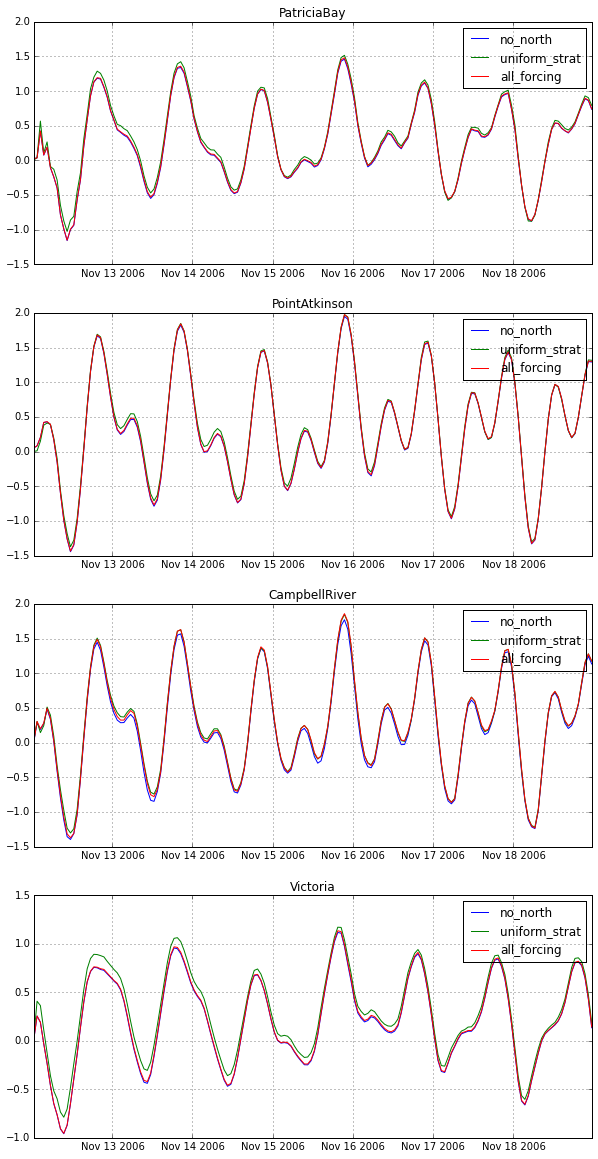

In [5]:
fig, axs=plt.subplots(4,1,figsize=(10,20))

for run in runs:
    for key,ax in zip(stations,axs):
        ax.plot(ts[run],sshs[run][key][:,0,0],label=run)
        ax.set_title(key)
        
for ax in axs:
    ax.legend()
    ax.grid()

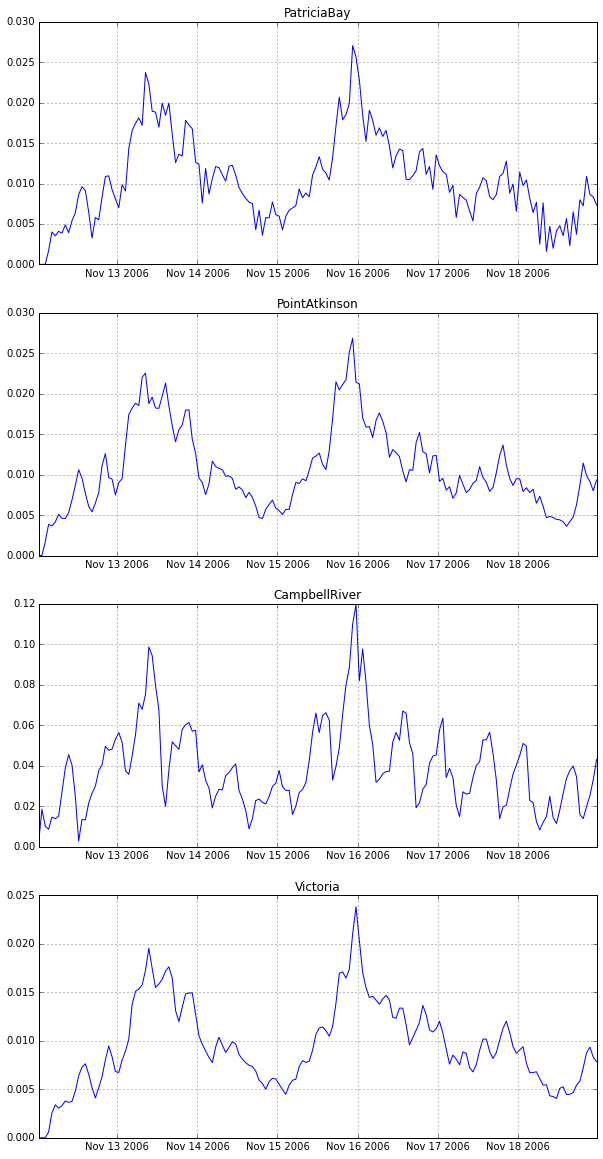

In [6]:
fig, axs=plt.subplots(4,1,figsize=(10,20))

run1='all_forcing'
run2='no_north'
for key,ax in zip(stations,axs):
        ax.plot(ts[run1],sshs[run1][key][:,0,0]-sshs[run2][key][:,0,0])
        ax.set_title(key)
        
for ax in axs:
    ax.grid()

Without north, only centimetres lower at all stations except Campbell River. Campbell River has up to 12 cm difference. 

# Uniform Stratification

Difference in SSH between uniform stratty and regular run. Also print mean/min/max diff for period after initial adjustment (72hours) 

PatriciaBay, Mean: -0.02376598306, Max: 0.0302366018295, Min: -0.0544674992561
PointAtkinson, Mean: -0.0151702286676, Max: 0.0162078738213, Min: -0.0767586827278
CampbellRiver, Mean: 0.00138164719101, Max: 0.0209602117538, Min: -0.0181328356266
Victoria, Mean: -0.0458372123539, Max: -0.0135049819946, Min: -0.0733124986291


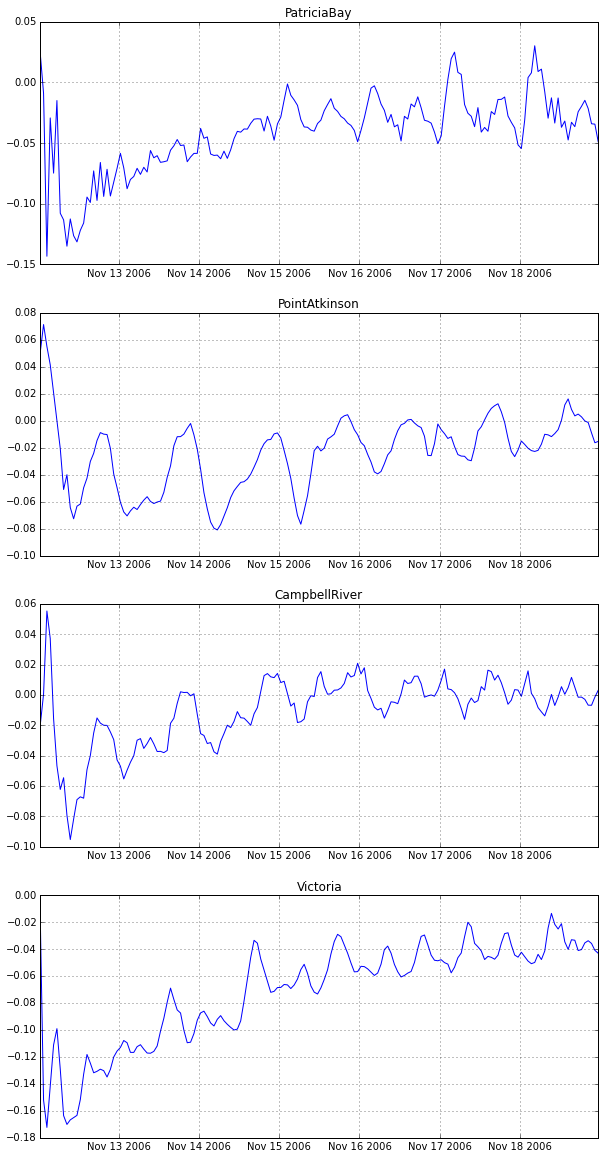

In [13]:
fig, axs=plt.subplots(4,1,figsize=(10,20))

run1='all_forcing'
run2='uniform_strat'
for key,ax in zip(stations,axs):
        diff = sshs[run1][key][:,0,0]-sshs[run2][key][:,0,0]
        ax.plot(ts[run1],sshs[run1][key][:,0,0]-sshs[run2][key][:,0,0])
        ax.set_title(key)
        print '{}, Mean: {}, Max: {}, Min: {}'.format(key,np.mean(diff[72:]),np.max(diff[72:]),np.min(diff[72:])) 
        
for ax in axs:
    ax.grid()

Sea Surface Height


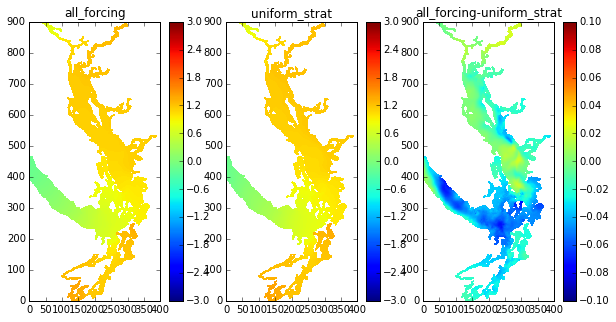

In [8]:
fig,axs=plt.subplots(1,3,figsize=(10,5))

ax=axs[0]
mesh=ax.pcolormesh(Es[run1],vmin=-3,vmax=3)
plt.colorbar(mesh,ax=ax)
ax.set_title(run1)

ax=axs[1]
mesh=ax.pcolormesh(Es[run2],vmin=-3,vmax=3)
plt.colorbar(mesh,ax=ax)
ax.set_title(run2)

ax=axs[2]
mesh=ax.pcolormesh(Es[run1]-Es[run2],vmin=-.1,vmax=.1)
plt.colorbar(mesh,ax=ax)
ax.set_title(run1 + '-' +run2)
print 'Sea Surface Height'

In [9]:
t = 41 #timestamp of background state
depthlevel=0
Us={}; Vs={}; Es ={}; Ss={}; Ts={};
for key in runs:
    [Us[key], Vs[key], Es[key], Ss[key], Ts[key]] = stormtools.get_variables(fUs[key],
                                                                                 fVs[key],fTs[key],t,depthlevel)

Salinty: end time


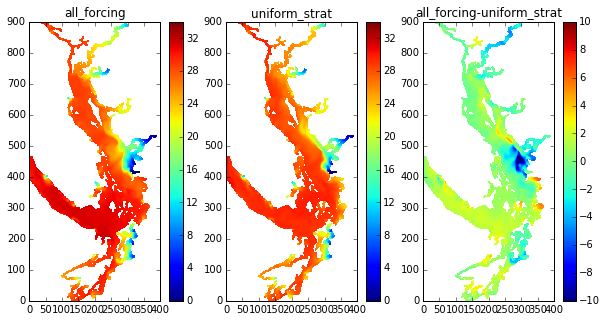

In [10]:
fig,axs=plt.subplots(1,3,figsize=(10,5))

ax=axs[0]
mesh=ax.pcolormesh(Ss[run1],vmin=0,vmax=34)
plt.colorbar(mesh,ax=ax)
ax.set_title(run1)

ax=axs[1]
mesh=ax.pcolormesh(Ss[run2],vmin=0,vmax=34)
plt.colorbar(mesh,ax=ax)
ax.set_title(run2)

ax=axs[2]
mesh=ax.pcolormesh(Ss[run1]-Ss[run2],vmin=-10,vmax=10)
plt.colorbar(mesh,ax=ax)
ax.set_title(run1 + '-' +run2)

print 'Salinty: end time'

In [11]:
t = 2#timestamp of background state
depthlevel=0
Us={}; Vs={}; Es ={}; Ss={}; Ts={};
for key in runs:
    [Us[key], Vs[key], Es[key], Ss[key], Ts[key]] = stormtools.get_variables(fUs[key],
                                                                                 fVs[key],fTs[key],t,depthlevel)

Salinity: t= 2


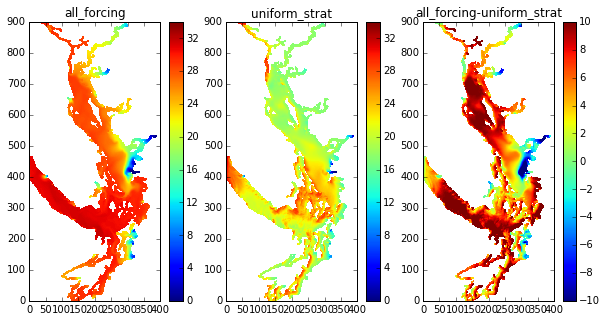

In [12]:
fig,axs=plt.subplots(1,3,figsize=(10,5))

ax=axs[0]
mesh=ax.pcolormesh(Ss[run1],vmin=0,vmax=34)
plt.colorbar(mesh,ax=ax)
ax.set_title(run1)

ax=axs[1]
mesh=ax.pcolormesh(Ss[run2],vmin=0,vmax=34)
plt.colorbar(mesh,ax=ax)
ax.set_title(run2)

ax=axs[2]
mesh=ax.pcolormesh(Ss[run1]-Ss[run2],vmin=-10,vmax=10)
plt.colorbar(mesh,ax=ax)
ax.set_title(run1 + '-' +run2)

print 'Salinity: t=', t

I'm surpised that the mixing happens so quickly in the uniform strat case. Even over the course of one day, the surface water in Haro Strait and south of Campbell River becomes much saltier than initialy. 

By the end of one week, the stratification in the all_forcing and uniform_strat cases are actually pretty similar.

Thought: Maybe the uniform strat case is a good testbed for mixing properties. But we don't see very much mixing in the 2D domain. 